In this code, I retrieve data from a wikipedia page on the top grossing movies, clean it up, and create a bar chart in matplotlib to show that everything works. Let's get into it!

First we want to import our python libraries. In this code, we will primarily use pandas, with a little bit of matplotlib at the end.

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

We will be grabing data from the 'List of highest-grossing films' wikipedia page using the URL and store it in the variable movies_url.

In [116]:
#pull in the URL
movies_url = r"https://en.wikipedia.org/wiki/List_of_highest-grossing_films"

Using the 'read_html' function in pandas allows us to create a list of all tables from movies_url.

In [117]:
#Returns a LIST of the tables in the URL
data = pd.read_html(movies_url)
type(data)

list

We index the data list to find our desired table. In this case, it just so happens that our table is at [0]

In [118]:
movies = data[0]
movies.head()

,Rank,Peak,Title,Worldwide gross,Year,Reference(s)
0,1,1,Avatar,"$2,847,246,203",2009,[# 1][# 2]
1,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4]
2,3,1,Titanic,"$2,187,425,379",1997,[# 5][# 6]
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 7][# 8]
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 9][# 10]


Now we have successfully pulled in a table from wikipedia and used pandas to convert it to a useful dataframe! Now let's start cleaning things up.

The first thing to note is that we don't need the References column on the right. It adds no value when analyzing the data, so let's remove it from the dataframe. Here, we use .iloc to include all rows (as indicated by ':') and all columns except the last one (as indicated by ':-1'). Finally, we can use .head() to show the first 5 rows in the movies dataframe.

In [119]:
movies = data[0].iloc[:,:-1]
movies.head()

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avatar,"$2,847,246,203",2009
1,2,1,Avengers: Endgame,"$2,797,501,328",2019
2,3,1,Titanic,"$2,187,425,379",1997
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018


Now the dataframe looks to be in good shape. Let's take a look at the datatypes of each row using .info()

In [120]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     object
 2   Title            50 non-null     object
 3   Worldwide gross  50 non-null     object
 4   Year             50 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


We would like the 'Peak' and 'World gross' columns to be of type int64 and 'Title' to be of type string. Let's see why we can't simply change their datatypes right away. (Note the code below will result in error)

In [123]:
try:
    movies['Worldwide gross'] = movies['Worldwide gross'].astype('int64')
except ValueError:
    print("An error occured")

An error occured


Running the above code, we can't convert the elements in the 'Worldwide gross' column to integers because of the '$' and ',' symbols. Somehow, we need to remove all of them. To do so, let's first convert the entire column to a string using the .replace function. Notice that it takes a dictionary as its argument!

In [124]:
r = {'Worldwide gross' : 'string'}
movies['Worldwide gross'] = movies['Worldwide gross'].replace(r, regex = True)

Now that all the elements in the 'Worldwide gross' column are strings, we can remove the dollar and comma characters using replace(). Note that we are replacing each character with an empty string ''. 

In [125]:
wg_clean = {',' : '', r'\$' : ''}
movies['Worldwide gross'] = movies['Worldwide gross'].replace(wg_clean , regex = True) #.astype('string')
movies.head()

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avatar,2847246203,2009
1,2,1,Avengers: Endgame,2797501328,2019
2,3,1,Titanic,2187425379,1997
3,4,3,Star Wars: The Force Awakens,2068223624,2015
4,5,4,Avengers: Infinity War,2048359754,2018


As we can see now, the dollar symbols and commas have been successfully removed. However, there are still problems with the dataframe that need to be cleaned. Let's take a look at some of them.

In [126]:
movies[18:26]

,Rank,Peak,Title,Worldwide gross,Year
18,19,11,The Fate of the Furious,F81238764765,2017
19,20,5,Iron Man 3,1214811252,2013
20,21,10,Minions,1159398397,2015
21,22,12,Captain America: Civil War,1153329473,2016
22,23,20,Aquaman,1148485886,2018
23,24,2,The Lord of the Rings: The Return of the King,1146030912,2003
24,25,24RK,Spider-Man: Far From Home,1131927996,2019
25,26,23RK,Captain Marvel,1128274794,2019


Above is a snippet of the movies dataframe. We can see that there are some irregularities. Look at the top row under the 'Worldwide gross' column. Clearly the 'F8' should not be there. Similarly, under the 'Peak' column in rows 24 and 25, we see letters that shouldn't be there. It turns out that these irregularities are actually reference links from the original table in the wikipedia article. Unfortunately for us, we need to remove them. Let's get to it! 

Once again, we use .replace(). This time, we use it to get rid of unwanted text in the 'Peak' column. Regex is set to True because the characters to be removed are only pieces of the data element.

In [127]:
#Clean the 'Peak' column of references
peak_clean = {'RK' : '', 'TS3' : '', 'DM2' : ''}
movies['Peak'] = movies['Peak'].replace(peak_clean, regex = True)

Using astype(), we can now change the datatypes of the values in the 'Peak' column to integers.

In [128]:
#now that the extra characters in Peak were removed, we can convert Peak to int64
movies['Peak'] = movies['Peak'].astype('int64')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     int64 
 2   Title            50 non-null     object
 3   Worldwide gross  50 non-null     object
 4   Year             50 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


Let's remove the pesky 'F' and 'F8' from rows 15 and 18, respectively. While there are many ways to go about this, let's remove the 'F8' by assigning the element to the known value from the wiki table. This is a brute force method, but it works. Note we use .iloc[18] to index a specific value in the column. We'll use .replace() for the 'F' in row 15.

In [132]:
movies['Worldwide gross'].iloc[18] = '1238764765'
movies['Worldwide gross'] = movies['Worldwide gross'].replace({'F' : ''}, regex = True)
#Note this code may give a warning, this can be ignored for now.

Now that all of the irregularities are fixed, we can now set all the columns to the desired datatypes. We can assign a dictionary with the column name and datatype assignments to the astype() function.

In [133]:
#Convert remaining columns to their proper dtypes 
col_type2 = {'Title' : 'string' , 'Worldwide gross' : 'int64'}
movies = movies.astype(col_type2)
movies.head()

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avatar,2847246203,2009
1,2,1,Avengers: Endgame,2797501328,2019
2,3,1,Titanic,2187425379,1997
3,4,3,Star Wars: The Force Awakens,2068223624,2015
4,5,4,Avengers: Infinity War,2048359754,2018


In [134]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             50 non-null     int64 
 1   Peak             50 non-null     int64 
 2   Title            50 non-null     string
 3   Worldwide gross  50 non-null     int64 
 4   Year             50 non-null     int64 
dtypes: int64(4), string(1)
memory usage: 2.1 KB


Now all of the columns are the right data types.

Finally, let's put our cleaning to the test with a simple bar chart using the matplotlib library. 

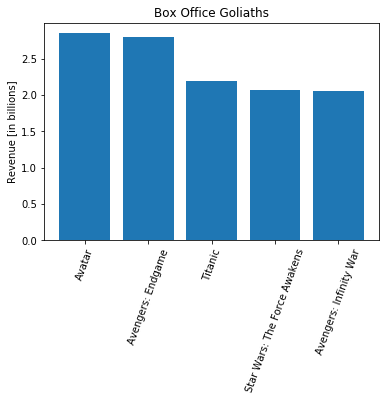

In [135]:
#Now let's plot the top 5 grossing movies of all time 
plt.bar(movies['Title'].head(), movies['Worldwide gross'].head()/(10E8))
plt.xticks(rotation = 70)
plt.title('Box Office Goliaths')
plt.ylabel('Revenue [in billions]')
plt.show()

And there we have it! The data has been grabbed from a wikipedia article and cleaned of any irregularities. Now the data is prepared for analysis and visualizations! 

I hope this walkthrough helped. Happy coding!